# Exciton Model for vdWHs

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import ase.units
from default_parameters import get_thickness

Hartree = ase.units.Hartree
Bohr = ase.units.Bohr

In [16]:
%matplotlib inline

In [17]:
from matplotlib import rcParams
rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"],
    "font.size": 16})
rcParams['axes.titlepad'] = 20

In [19]:
def heatmap(data, xlabels, ylabels, cbarlabel, **kwargs):
    # if not ax:
    #     ax = plt.gca()
    
    plt.imshow(data, **kwargs)
    plt.xticks(np.arange(len(xlabels)), labels=xlabels)
    plt.yticks(np.arange(len(ylabels)), labels=ylabels)

    im_ratio = data.shape[0]/data.shape[1]
    plt.colorbar(label=cbarlabel,fraction=0.046*im_ratio, pad=0.04)
    # cbar.ax.set_ylabel(cbarlabel, rotation=0, va="bottom")

    # Loop over data dimensions and create text annotations.
    for i in range(len(ylabels)):
        for j in range(len(xlabels)):
            colors = ['k', 'w']
            color = colors[int(data[i,j] > np.mean(data))]
            plt.text(j, i, data[i, j], ha="center", va="center", color=color)

## QEH Masses and Potentials

In [20]:
materials = ['WS2','MoS2','WSe2','MoSe2','CrS2','CrSe2']
nFilling = 3
nPadding = 0

def load_hs(fileprefix, nFilling, nPadding):
    vdWH = np.load(fileprefix + '_nFilling=' + str(nFilling) + '_nPadding=' + str(nPadding) + '.npz')
    return vdWH

In [21]:
vdWH_qeh = load_hs('wannier', nFilling, nPadding)
E_b_heat_xlabels = vdWH_qeh['E_b_heat_xlabels']
E_b_heat_ylabels = vdWH_qeh['E_b_heat_ylabels']

In [22]:
def plot_E_B(vdWH, cbarlabel = r'$E_b$ [meV]', file_ending='unknown'):
    E_b_heat_mat = vdWH['E_b_heat_mat']
    E_b_heat_xlabels = vdWH['E_b_heat_xlabels']
    E_b_heat_ylabels = vdWH['E_b_heat_ylabels']
    heatmap(np.round(E_b_heat_mat*10**3).astype(int),
        E_b_heat_xlabels, E_b_heat_ylabels, cbarlabel=cbarlabel,
        cmap='Blues')
    plt.tight_layout()
    plt.savefig('./plots/vdWH_E_b_' + file_ending + '.pdf')
    plt.savefig('./plots/vdWH_E_b_' + file_ending + '.png')
    plt.show()

Exciton binding energies for different
 bilayer combinations with 0 encapsulating and 3 inner hBN layers
 using QEH masses and potentials


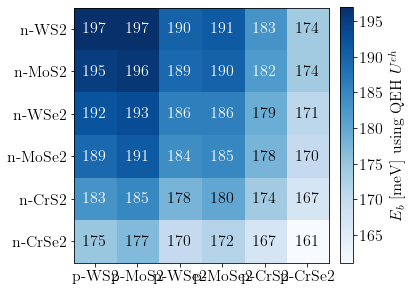

In [23]:
vdWH_qeh = load_hs('wannier', nFilling, nPadding)
E_b_heat_xlabels = vdWH_qeh['E_b_heat_xlabels']
E_b_heat_ylabels = vdWH_qeh['E_b_heat_ylabels']
fig = plt.figure(1, figsize=(6,6))
print('Exciton binding energies for different\n bilayer combinations with {} encapsulating and {} inner hBN layers\n using QEH masses and potentials'.format(nPadding, nFilling))
plot_E_B(vdWH_qeh, cbarlabel=r'$E_b$ [meV] using QEH $U^{eh}$', file_ending='abinitio')

## Analytic Coulomb potential using QEH Masses

Exciton binding energies for different
 bilayer combinations with 0 encapsulating and 3 inner hBN layers
 Analytic Coulomb Potential using QEH Masses


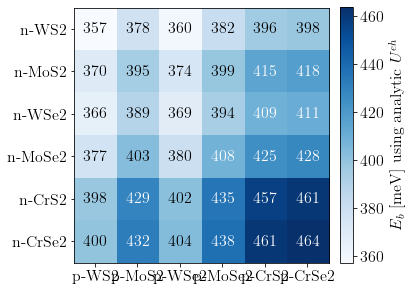

In [9]:
vdWH_analytic = load_hs('wannier_analytic', nFilling, nPadding)
fig = plt.figure(1, figsize=(6,6))
print('Exciton binding energies for different\n bilayer combinations with {} encapsulating and {} inner hBN layers\n Analytic Coulomb Potential using QEH Masses'.format(nPadding, nFilling))
plot_E_B(vdWH_analytic, cbarlabel=r'$E_b$ [meV] using analytic $U^{eh}$', file_ending='analytic')

### Plot of exciton masses from QEH-Library

Exciton mass from QEH
[[0.16746269 0.20337209 0.17217391 0.21032967]
 [0.18987013 0.23739583 0.19594937 0.24693069]
 [0.18164384 0.22467391 0.1872     0.23319588]
 [0.20072289 0.25460784 0.20752941 0.26560748]]


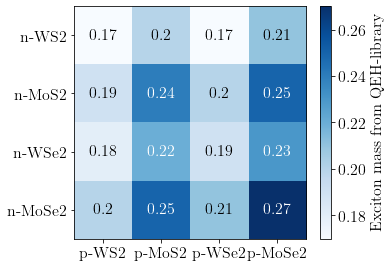

In [40]:
#effective masses that we use
me_vec=np.array([0.33,0.43,0.39,0.49])
mh_vec=np.array([0.34,0.53,0.36,0.58])

description = 'Exciton mass from QEH'
print(description)
mu_matrix=np.zeros((4,4))
for i in range(4):
    for j in range(4):
        mu_matrix[i,j]=1/(1/me_vec[i]+1/mh_vec[j])
print(mu_matrix)
heatmap(np.round(mu_matrix,2),
            E_b_heat_xlabels, E_b_heat_ylabels, cbarlabel=r'Exciton mass from QEH-library',
    cmap='Blues')
plt.tight_layout()
plt.savefig('./plots/vdWH_excMass_QEH.pdf')
plt.savefig('./plots/vdWH_excMass_QEH.png')
plt.show()

## Analytic Coulomb potential using Masses from Conti S. et al.

Exciton binding energies for different
 bilayer combinations with 0 encapsulating and 3 inner hBN layers
 Analytic Coulomb Potential using Masses from Conti et al.


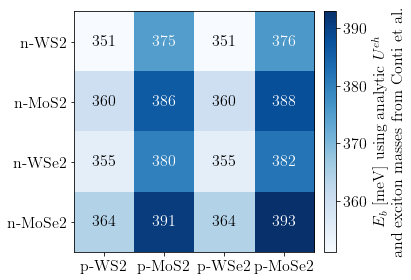

In [41]:
vdWH_analytic = load_hs('wannier_analytic_article_masses', nFilling, nPadding)
fig = plt.figure(1, figsize=(6,6))
print('Exciton binding energies for different\n bilayer combinations with {} encapsulating and {} inner hBN layers\n Analytic Coulomb Potential using Masses from Conti et al.'.format(nPadding, nFilling))
plot_E_B(vdWH_analytic, cbarlabel='$E_b$ [meV] using analytic $U^{eh}$ \n and exciton masses from Conti et al.', file_ending='analytic_articMass')

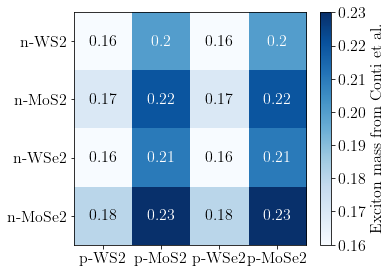

In [42]:
#data from article
me_vec=np.array([0.33,0.40,0.36,0.43])
mh_vec=np.array([0.30,0.48,0.30,0.50])

mu_matrix=np.zeros((4,4))
for i in range(4):
    for j in range(4):
        mu_matrix[i,j]=1/(1/me_vec[i]+1/mh_vec[j])
heatmap(np.round(mu_matrix,2),
            E_b_heat_xlabels, E_b_heat_ylabels, cbarlabel=r'Exciton mass from Conti et al.',
    cmap='Blues')
plt.tight_layout()
plt.savefig('./plots/vdWH_effMass_article.pdf')
plt.savefig('./plots/vdWH_effMass_article.png')
plt.show()

## Exciton Binding Energies from Conti et al.

In [43]:
Eb_article=np.array([[375,375,368,385],[390,396,388,405],[368,372,365,375],[400,405,390,412]])
Eb_article.transpose().flatten()

array([375, 390, 368, 400, 375, 396, 372, 405, 368, 388, 365, 390, 385,
       405, 375, 412])

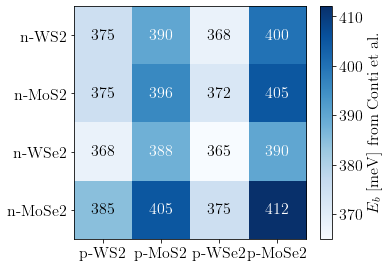

In [44]:
# Eb_matrix=np.array([[396,405,390,388],[405,412,400,390],[375,385,375,368],[372,375,368,365]]) # MoS2, MoSe2, WS2, WSe2
Eb_article=np.array([[375,375,368,385],[390,396,388,405],[368,372,365,375],[400,405,390,412]])
heatmap(np.round(Eb_article).transpose(),
            E_b_heat_xlabels, E_b_heat_ylabels, cbarlabel=r'$E_b$ [meV] from Conti et al.',
    cmap='Blues')
plt.tight_layout()
plt.savefig('./plots/vdWH_E_b_article_transpose.pdf')
plt.savefig('./plots/vdWH_E_b_article_transpose.png')
plt.show()

## QEH potential using Masses from Conti S. et al.

Exciton binding energies for different
 bilayer combinations with 0 encapsulating and 3 inner hBN layers
 QEH Potential using Masses from Conti et al.


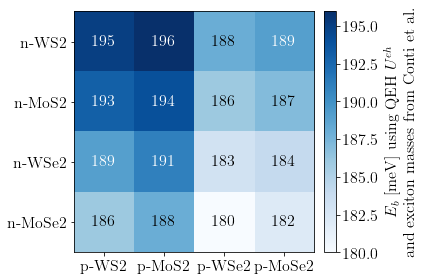

In [45]:
vdWH_qeh_article_masses = load_hs('wannier_qeh_article_masses', nFilling, nPadding)
fig = plt.figure(1, figsize=(6,6))
print('Exciton binding energies for different\n bilayer combinations with {} encapsulating and {} inner hBN layers\n QEH Potential using Masses from Conti et al.'.format(nPadding, nFilling))
plot_E_B(vdWH_qeh_article_masses, cbarlabel='$E_b$ [meV] using QEH $U^{eh}$ \n and exciton masses from Conti et al.', file_ending='qeh_articMass')

# Discussion: Comparison of Binding energies from Conti et al. and Wannier model using QEH and screened potential

In [46]:
def read_bilayer_E_b(bilayer, vdWH):
    '''@returns U_ee, U_eh, U_eh_r, epsM, E_b
    '''
    i = list(vdWH['bilayer']).index(bilayer)
    E_b = vdWH['E_b'][i]
    return E_b

In [47]:
bilayers = ['n-WS2, p-WS2', 'n-MoS2, p-MoS2', 'n-WSe2, p-WSe2', 'n-MoSe2, p-MoSe2']

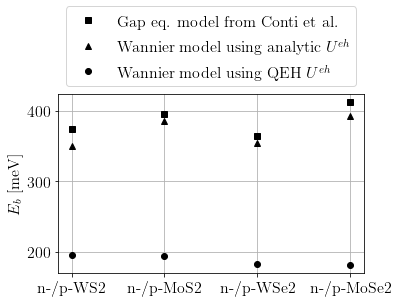

In [91]:
fig = plt.figure(1,figsize=(5.8,4.5))
E_bs_article = np.zeros(len(bilayers))
E_bs_analytic = np.zeros(len(bilayers))
E_bs_qeh = np.zeros(len(bilayers))
for (i, bilayer) in enumerate(bilayers):
    j = list(vdWH_qeh_article_masses['bilayer']).index(bilayer)
    E_bs_article[i] = Eb_article.transpose().flatten()[j] * 10**(-3)

    E_bs_analytic[i] = read_bilayer_E_b(bilayer, vdWH_analytic)
    E_bs_qeh[i] = read_bilayer_E_b(bilayer, vdWH_qeh_article_masses)

xtick_labels = ['n-/p-' + m for m in materials]
plt.plot(xtick_labels, E_bs_article*10**3, 'ks', label='Gap eq. model from Conti et al.')
plt.plot(xtick_labels, E_bs_analytic*10**3, 'k^', label='Wannier model using analytic $U^{eh}$')
plt.plot(xtick_labels, E_bs_qeh*10**3, 'ko', label='Wannier model using QEH $U^{eh}$')
plt.ylabel(r'$E_b$ [meV]')
plt.grid()
plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=1)
plt.tight_layout()
plt.savefig('./plots/E_b_comparison.pdf')
plt.savefig('./plots/E_b_comparison.png')